In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


In [2]:
df_train = pd.read_csv("train_values.csv")
df_test = pd.read_csv("test_values.csv")
target = pd.read_csv("train_labels.csv")

df = pd.merge(df_train,target,on="building_id")

df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


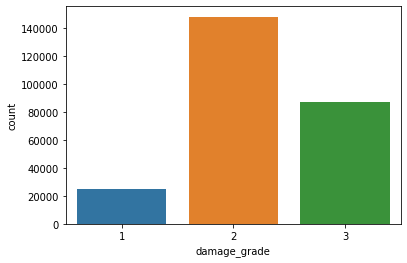

In [3]:
sns.countplot(x="damage_grade" , data=target)

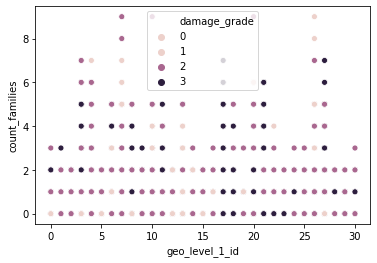

In [4]:
sns.scatterplot(x="geo_level_1_id",y="count_families",hue="damage_grade",data=df)

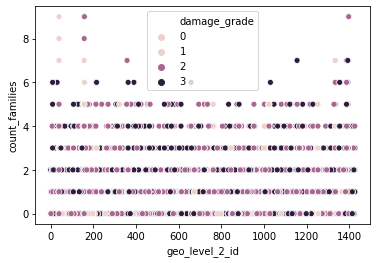

In [5]:
sns.scatterplot(x="geo_level_2_id",y="count_families",hue="damage_grade",data=df)

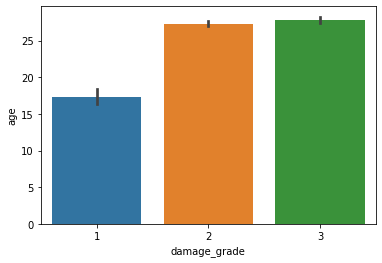

In [6]:
sns.barplot(y="age",x="damage_grade",data=df)

In [7]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [8]:
df_test.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [9]:
X = df.iloc[:, 1:-1]
test = df_test.iloc[:, 1:]
y = df.iloc[:, -1]

In [10]:
def preprocessing(z):
    categorical_cols = [col for col in z.columns if z[col].dtype == "object"]
    le = LabelEncoder()
    ohe = OneHotEncoder()
    for col in categorical_cols:
        z[col] = le.fit_transform(z[col])
        z[col] = ohe.fit_transform(z[col].values.reshape(-1,1)).toarray()
        
preprocessing(X)
preprocessing(test)
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

In [12]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
f1_score(y_test,model.predict(X_test),average="micro")

0.7160819124851306

In [13]:
importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))  

Feature: 0, Score: 0.14727
Feature: 1, Score: 0.14934
Feature: 2, Score: 0.17349
Feature: 3, Score: 0.01797
Feature: 4, Score: 0.12912
Feature: 5, Score: 0.12174
Feature: 6, Score: 0.05927
Feature: 7, Score: 0.01460
Feature: 8, Score: 0.00171
Feature: 9, Score: 0.01620
Feature: 10, Score: 0.01449
Feature: 11, Score: 0.00463
Feature: 12, Score: 0.00732
Feature: 13, Score: 0.00037
Feature: 14, Score: 0.00851
Feature: 15, Score: 0.02117
Feature: 16, Score: 0.00669
Feature: 17, Score: 0.00375
Feature: 18, Score: 0.00689
Feature: 19, Score: 0.01049
Feature: 20, Score: 0.01220
Feature: 21, Score: 0.00746
Feature: 22, Score: 0.00670
Feature: 23, Score: 0.00632
Feature: 24, Score: 0.00361
Feature: 25, Score: 0.00426
Feature: 26, Score: 0.02582
Feature: 27, Score: 0.00694
Feature: 28, Score: 0.00455
Feature: 29, Score: 0.00369
Feature: 30, Score: 0.00140
Feature: 31, Score: 0.00025
Feature: 32, Score: 0.00013
Feature: 33, Score: 0.00041
Feature: 34, Score: 0.00005
Feature: 35, Score: 0.00005
Fe

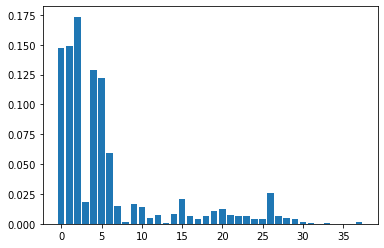

In [14]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [15]:
X["has_secondary_use"] = X.iloc[:, 27:].sum(axis=1)
X.drop(columns=["has_secondary_use_agriculture","has_secondary_use_hotel","has_secondary_use_rental","has_secondary_use_institution"	,"has_secondary_use_school","has_secondary_use_industry","has_secondary_use_health_post","has_secondary_use_gov_office","has_secondary_use_use_police",	"has_secondary_use_other"],inplace=True)

In [16]:
X.head(20)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use
0,6,487,12198,2,30,6,5,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0.0,1,0
1,8,900,2812,2,10,8,7,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0.0,1,0
2,21,363,8973,2,10,5,5,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0.0,1,0
3,22,418,10694,2,10,6,5,0.0,0.0,1.0,...,0,0,1,1,0,0,0,0.0,1,0
4,11,131,1488,3,30,8,9,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0.0,1,0
5,8,558,6089,2,10,9,5,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0.0,1,2
6,9,475,12066,2,25,3,4,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0.0,1,0
7,20,323,12236,2,0,8,6,0.0,0.0,0.0,...,0,1,1,0,0,0,0,0.0,1,0
8,0,757,7219,2,15,8,6,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0.0,1,0
9,26,886,994,1,0,13,4,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0.0,1,0


In [17]:
X["has_secondary_use"].value_counts()

0    231445
2     28599
3       557
Name: has_secondary_use, dtype: int64

In [18]:
test["has_secondary_use"] = test.iloc[:, 27:].sum(axis=1)
test.drop(columns=["has_secondary_use_agriculture","has_secondary_use_hotel","has_secondary_use_rental","has_secondary_use_institution"	,"has_secondary_use_school","has_secondary_use_industry","has_secondary_use_health_post","has_secondary_use_gov_office","has_secondary_use_use_police",	"has_secondary_use_other"],inplace=True)

In [19]:
X.drop(columns=list(X.iloc[:, [8,11,12,13,14,16,17,18,21,22,23,24,25]].columns),inplace=True)

In [20]:
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,roof_type,ground_floor_type,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_timber,count_families,has_secondary_use
0,6,487,12198,2,30,6,5,0.0,1.0,1.0,1,0,0,1,0
1,8,900,2812,2,10,8,7,0.0,1.0,0.0,1,0,0,1,0
2,21,363,8973,2,10,5,5,0.0,1.0,1.0,1,0,0,1,0
3,22,418,10694,2,10,6,5,0.0,1.0,1.0,1,0,1,1,0
4,11,131,1488,3,30,8,9,0.0,1.0,1.0,0,0,0,1,0


In [21]:
X.shape

(260601, 15)

In [22]:
test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use
0,17,596,11307,3,20,7,6,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0.0,1,0
1,6,141,11987,2,25,13,5,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0.0,1,2
2,22,19,10044,2,5,4,5,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0.0,1,0
3,26,39,633,1,0,19,3,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0.0,2,2
4,17,289,7970,3,15,8,7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,1,0


In [23]:
test.drop(columns=list(test.iloc[:, [8,11,12,13,14,16,17,18,21,22,23,24,25]].columns),inplace=True)


In [24]:
test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,roof_type,ground_floor_type,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_timber,count_families,has_secondary_use
0,17,596,11307,3,20,7,6,0.0,1.0,1.0,1,0,0,1,0
1,6,141,11987,2,25,13,5,0.0,1.0,1.0,1,0,0,1,2
2,22,19,10044,2,5,4,5,0.0,1.0,1.0,1,0,0,1,0
3,26,39,633,1,0,19,3,0.0,0.0,0.0,0,1,0,2,2
4,17,289,7970,3,15,8,7,0.0,0.0,1.0,1,0,0,1,0


In [25]:
test.shape

(86868, 15)

In [26]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

In [27]:
model.fit(X_train, y_train)
f1_score(y_test,model.predict(X_test),average="micro")

0.7107353449047723

Feature: 0, Score: 0.15946
Feature: 1, Score: 0.16454
Feature: 2, Score: 0.18980
Feature: 3, Score: 0.02263
Feature: 4, Score: 0.13587
Feature: 5, Score: 0.13019
Feature: 6, Score: 0.06394
Feature: 7, Score: 0.01441
Feature: 8, Score: 0.01686
Feature: 9, Score: 0.01539
Feature: 10, Score: 0.02411
Feature: 11, Score: 0.01095
Feature: 12, Score: 0.01263
Feature: 13, Score: 0.02675
Feature: 14, Score: 0.01246


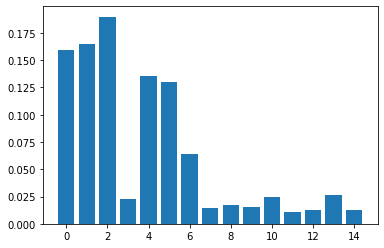

In [28]:
importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))  
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()    

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100,300, 500], 'max_features': [6,10, 12, 14]}
clf = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=5, verbose=20, scoring="f1_micro")
clf.fit(X_train, y_train)

In [29]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit_transform(X)
st.fit(test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
fin_model  = RandomForestClassifier(n_estimators=300,max_features=10)
fin_model.fit(X,y)

y_hat = fin_model.predict(test)

In [31]:
predictions = pd.DataFrame({"building_id":df_test.building_id,"damage_grade":y_hat})

predictions.to_csv("output1.csv",index=False)

predictions.head()

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,3
3,745817,1
4,421793,2
